# --- Day 10: Pipe Maze ---

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def read_input(infile):
    
    with open(infile) as f:
        m = [list(x) for x in f.read().split("\n") if x.strip()]
    m = np.array(m)
  
    # Convert to network
    G = nx.Graph()
    start = None
  
    # Nodes
    for i in range(m.shape[0]):
        for j in range(m.shape[1]):  
            
            if m[i,j] != ".":
                G.add_node((i,j))
            
            if m[i,j] == "S":
                start = (i,j)      
    # Edges
    for i in range(m.shape[0]):
        for j in range(m.shape[1]):  
            if m[i,j] != ".":

                connects = []
               
                if m[i, j] == "|":
                    connects = [(i+1, j), (i-1, j)]
                
                elif m[i, j] == "-":
                    connects = [(i, j+1), (i, j-1)]
                
                elif m[i, j] == "L":
                    connects = [(i-1, j), (i, j+1)]    
                
                elif m[i, j] == "J":
                    connects = [(i-1, j), (i, j-1)]  
                
                elif m[i, j] == "7":
                    connects = [(i+1, j), (i, j-1)]  

                elif m[i, j] == "F":
                    connects = [(i+1, j), (i, j+1)]  

                #print(i,j, m[i, j], connects)
                
                for connect in connects:
                    if connect in G.nodes():
                        G.add_edge((i,j), connect)
    return G, start

G, start = read_input("input.1.txt")

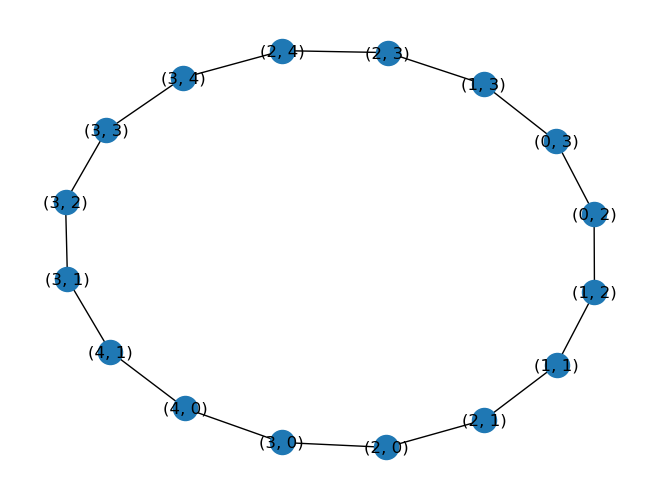

In [5]:
nx.draw(G, with_labels=True)

In [53]:
max(nx.single_source_shortest_path_length(G, start).values())

314